In [66]:
import pandas as pd
import pickle
fold1 = pd.read_csv('../data/final/fold1.csv')
fold2 = pd.read_csv('../data/final/fold2.csv')
fold3 = pd.read_csv('../data/final/fold3.csv')
fold4 = pd.read_csv('../data/final/fold4.csv')


/Users/zhannahakhverdyan/anaconda3/envs/predict_dialisys_need/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [67]:
fold1.set_index('Unnamed: 0', inplace=True)
fold2.set_index('Unnamed: 0', inplace=True)
fold3.set_index('Unnamed: 0', inplace=True)
fold4.set_index('Unnamed: 0', inplace=True)
columns = ['BUN_min', 'BUN_mean', 'BUN_max', 'BUN_var', 'bicarbonate_min',
       'bicarbonate_mean', 'bicarbonate_max', 'bicarbonate_var', 'calcium_min',
       'calcium_mean', 'calcium_max', 'calcium_var', 'chloride_min',
       'chloride_mean', 'chloride_max', 'chloride_var', 'creatinine_min',
       'creatinine_mean', 'creatinine_max', 'creatinine_var', 'glucose_min',
       'glucose_mean', 'glucose_max', 'glucose_var', 'potassium_min',
       'potassium_mean', 'potassium_max', 'potassium_var', 'sodium_min',
       'sodium_mean', 'sodium_max', 'sodium_var']
X_train = pd.concat([fold1[columns], fold2[columns], fold3[columns]], axis=0)
print(X_train.shape)
y_train = pd.concat([fold1['positive_window'], fold2['positive_window'], fold3['positive_window']], axis=0)
print(y_train.shape)
X_test = fold4[columns]
print(X_test.shape)
y_test = fold4['positive_window']
print(y_test.shape)

(132164, 32)
(132164,)
(43720, 32)
(43720,)


[[0.78143807 0.21856193]
 [0.36343386 0.63656614]]
              precision    recall  f1-score   support

         0.0       0.93      0.78      0.85     37884
         1.0       0.31      0.64      0.42      5836

    accuracy                           0.76     43720
   macro avg       0.62      0.71      0.63     43720
weighted avg       0.85      0.76      0.79     43720

Average precision: 0.34494333964214885


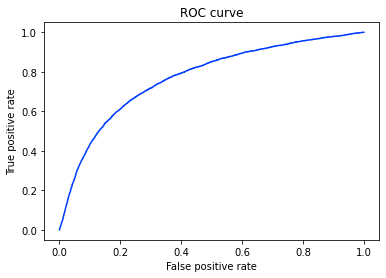

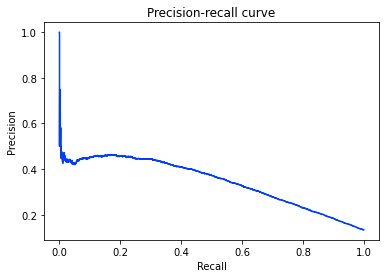

In [86]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt

random_state=2020
lr = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=random_state)
lr.fit(X_train, y_train)
y_score = lr.predict(X_test)

print(confusion_matrix(y_test,y_score, normalize='true'))
print(classification_report(y_test,y_score))

y_pred = lr.predict_proba(X_test)[:,1]
print('Average precision: {}'.format(average_precision_score(y_test, y_pred)))

fpr, tpr, auc_th = roc_curve(y_test, y_pred)
precision, recall, pr_th = precision_recall_curve(y_test, y_pred)

plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-recall curve')
plt.show()

In [87]:
from sklearn.metrics import roc_auc_score
print('Average ROC score: {}'.format(roc_auc_score(y_test, y_pred)))

Average ROC score: 0.7710032950048664


In [90]:
lr.coef_

array([[ 4.52955348e-02, -1.17553859e-01, -4.68843601e-02,
        -5.47925624e-02,  5.49026131e+00,  3.59985983e-04,
         1.78417016e-01,  5.21082997e-02,  1.47371768e-02,
        -6.65455176e-02,  5.42364049e-03,  7.94650224e-04,
         5.70192966e-02,  8.04727032e-02, -4.88424705e-02,
         1.49671382e-02,  9.19453830e-03,  3.28086744e-02,
         2.48410157e-02,  9.31854721e-02,  2.72582934e-02,
        -4.24419418e-02,  3.28646515e-02, -1.88084667e-03,
        -3.03162254e+00, -3.23141523e+00,  9.73692322e-01,
        -1.19121589e-01, -4.53702499e-04,  4.69451667e-04,
         4.44139728e-04, -8.90560902e-06, -4.32451069e-01,
         3.72522909e-01,  1.38496913e-02, -1.55781402e-01,
        -2.58176388e-02,  9.19318865e-03, -4.85809878e-03,
         1.83786853e-03]])

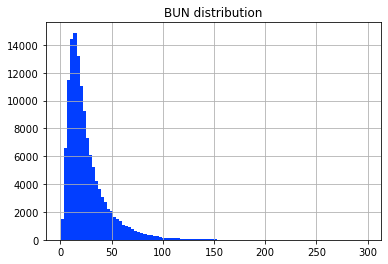

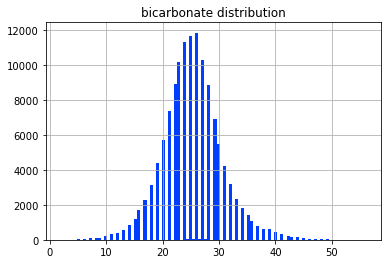

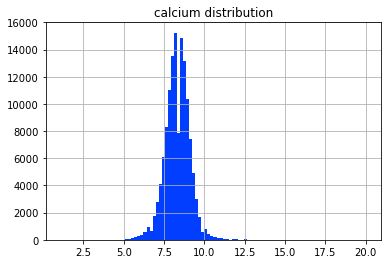

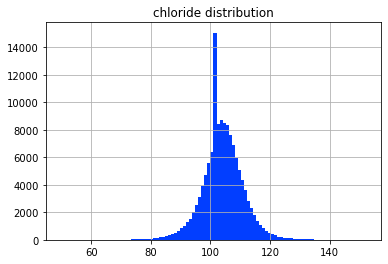

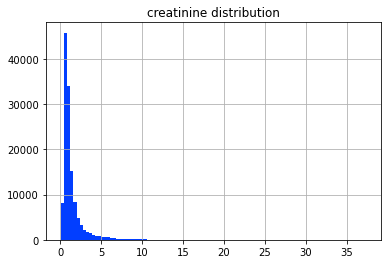

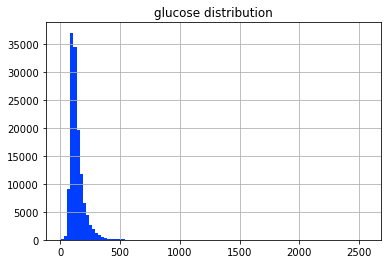

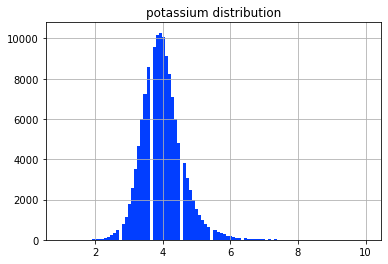

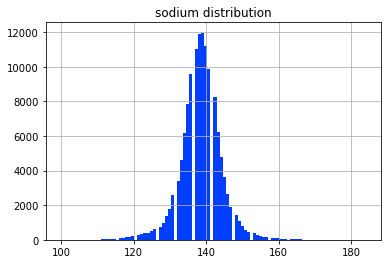

In [93]:
for column in ['BUN', 'bicarbonate', 'calcium', 'chloride',\
       'creatinine', 'glucose', 'potassium', 'sodium']:
    X_train[column].hist(bins=100)
    plt.title(column+' distribution')
    plt.show()

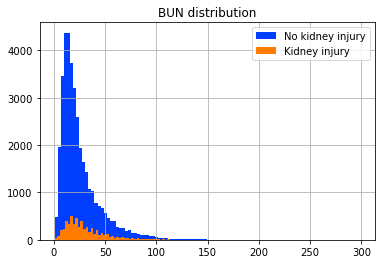

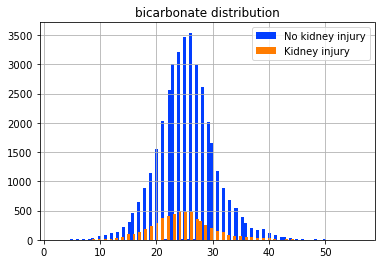

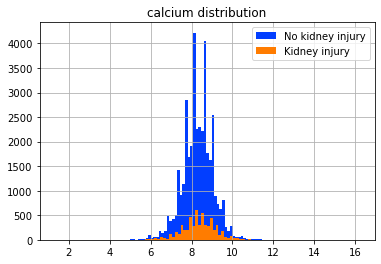

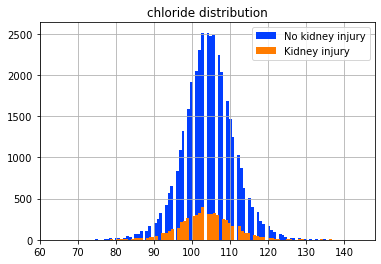

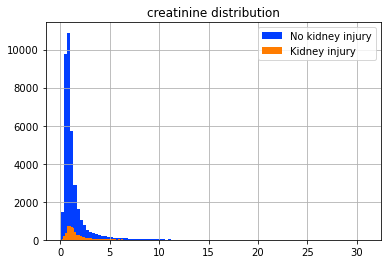

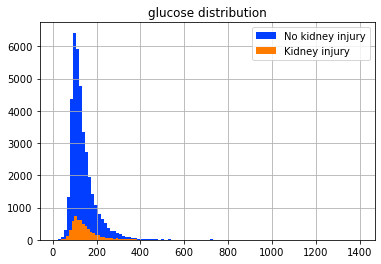

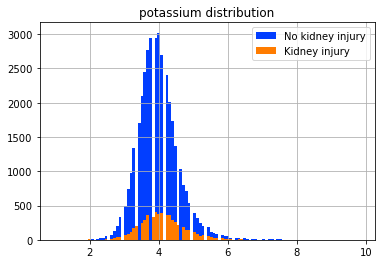

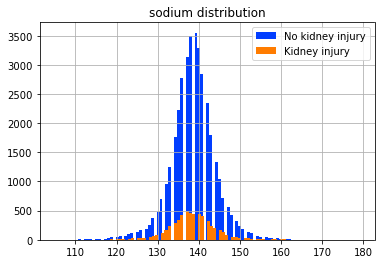

In [96]:
for column in ['BUN', 'bicarbonate', 'calcium', 'chloride',\
       'creatinine', 'glucose', 'potassium', 'sodium']:
    fold1.groupby('positive_window')[column].hist(bins=100)
    plt.title(column+' distribution')
    plt.legend(['No kidney injury', 'Kidney injury'])
    #L.get_texts()[0].set_text('No kidney injury')
   # L.get_texts()[1].set_text('Kidney injury')
    plt.show()

In [91]:
feat_df_lr = pd.DataFrame({'Features' : X_test.columns, \
                       'Importance' : np.squeeze(lr.coef_)})
feat_df_lr.sort_values(by='Importance', ascending=False, inplace=True)
feat_df_lr.head(10)

,Features,Importance
4,creatinine,5.490261
26,creatinine_max,0.973692
33,potassium_mean,0.372523
6,potassium,0.178417
19,calcium_var,0.093185
13,bicarbonate_mean,0.080473
12,bicarbonate_min,0.057019
7,sodium,0.052108
0,BUN,0.045296
22,chloride_max,0.032865


In [23]:
cv1_train = np.concatenate((np.array(fold1.index), np.array(fold2.index)))
cv1_test = np.array(fold3.index)
cv2_train = np.concatenate((np.array(fold1.index), np.array(fold3.index))) 
cv2_test = np.array(fold2.index)
cv3_train = np.concatenate((np.array(fold2.index), np.array(fold3.index)))
cv3_test = np.array(fold1.index)
custom_cv = []
custom_cv.append((cv1_train, cv1_test))
custom_cv.append((cv2_train, cv2_test))
custom_cv.append((cv3_train, cv3_test))
custom_cv

[(array([   27,    28,    40, ..., 89318, 89319, 89320]),
  array([    5,     6,     7, ..., 89329, 89330, 89331])),
 (array([   27,    28,    40, ..., 89329, 89330, 89331]),
  array([    8,    17,    81, ..., 89318, 89319, 89320])),
 (array([    8,    17,    81, ..., 89329, 89330, 89331]),
  array([   27,    28,    40, ..., 89313, 89321, 89322]))]

In [68]:
# change the prediction window to 12-36h
def relabel_data(df):
    df['time_to_detect'] = pd.to_timedelta(df['time_to_detect'])
    df.loc[df['time_to_detect']<=pd.Timedelta('36h'), 'positive_window'] = 1
    return df

print(fold1.positive_window.sum()/len(fold1))
fold1 = relabel_data(fold1)
print(fold1.positive_window.sum()/len(fold1))
fold2 = relabel_data(fold2)
fold3 = relabel_data(fold3)
fold4 = relabel_data(fold4)

columns = ['BUN', 'bicarbonate', 'calcium', 'chloride',
       'creatinine', 'glucose', 'potassium', 'sodium',
           'BUN_min', 'BUN_mean', 'BUN_max', 'BUN_var', 'bicarbonate_min',
       'bicarbonate_mean', 'bicarbonate_max', 'bicarbonate_var', 'calcium_min',
       'calcium_mean', 'calcium_max', 'calcium_var', 'chloride_min',
       'chloride_mean', 'chloride_max', 'chloride_var', 'creatinine_min',
       'creatinine_mean', 'creatinine_max', 'creatinine_var', 'glucose_min',
       'glucose_mean', 'glucose_max', 'glucose_var', 'potassium_min',
       'potassium_mean', 'potassium_max', 'potassium_var', 'sodium_min',
       'sodium_mean', 'sodium_max', 'sodium_var']
X_train = pd.concat([fold1[columns], fold2[columns], fold3[columns]], axis=0)
print(X_train.shape)
y_train = pd.concat([fold1['positive_window'], fold2['positive_window'], fold3['positive_window']], axis=0)
print(y_train.shape)
X_test = fold4[columns]
print(X_test.shape)
y_test = fold4['positive_window']
print(y_test.shape)
print(y_train.sum()/len(y_train))
print(y_test.sum()/len(y_test))

0.06696634393729829
0.13038266482249886
(132164, 40)
(132164,)
(43720, 40)
(43720,)
0.12974032262946036
0.1334858188472095


In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
rf = RandomForestClassifier(class_weight='balanced', random_state=random_state)
param_grid = {'max_depth' : [3, 6, 12, None], 'n_estimators' : [10, 50, 100, 200], 'max_features': [None, 'sqrt'], \
              'min_samples_split': [2, 10]}
scoring = {'AUC':'roc_auc', 'Average precision':make_scorer(average_precision_score)}
gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring=scoring, refit='Average precision',\
                  n_jobs=-1, cv=custom_cv, verbose=1, return_train_score=True)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 192 out of 192 | elapsed: 87.4min finished


GridSearchCV(cv=[(array([   27,    28,    40, ..., 89318, 89319, 89320]),
                  array([    5,     6,     7, ..., 89329, 89330, 89331])),
                 (array([   27,    28,    40, ..., 89329, 89330, 89331]),
                  array([    8,    17,    81, ..., 89318, 89319, 89320])),
                 (array([    8,    17,    81, ..., 89329, 89330, 89331]),
                  array([   27,    28,    40, ..., 89313, 89321, 89322]))],
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=...
                                              random_state=2020, verbose=0,
                                              warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [3, 6, 12, None],
                         'max_features': [None, 'sqrt'],
                         'min_samples_split': [2, 10],
                         'n_est

In [31]:
#gs.cv_results_

[[0.99778271 0.00221729]
 [0.98492118 0.01507882]]
              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93     37884
         1.0       0.51      0.02      0.03      5836

    accuracy                           0.87     43720
   macro avg       0.69      0.51      0.48     43720
weighted avg       0.82      0.87      0.81     43720

Average precision: 0.3234079929295847
Average ROC score: 0.7565084641337589


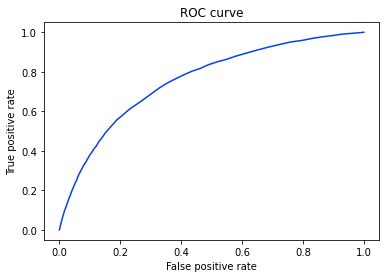

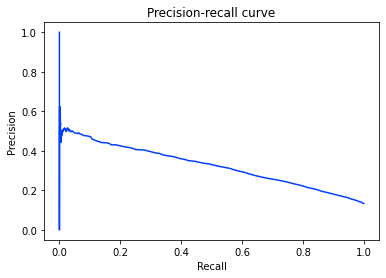

In [106]:
y_score = gs.best_estimator_.predict(X_test)

print(confusion_matrix(y_test,y_score, normalize='true'))
print(classification_report(y_test,y_score))

y_pred = gs.best_estimator_.predict_proba(X_test)[:,1]
print('Average precision: {}'.format(average_precision_score(y_test, y_pred)))
print('Average ROC score: {}'.format(roc_auc_score(y_test, y_pred)))

fpr, tpr, auc_th = roc_curve(y_test, y_pred)
precision, recall, pr_th = precision_recall_curve(y_test, y_pred)

plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-recall curve')
plt.show()


In [107]:
np.where(recall>=0.5)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),)

In [108]:
precision[39]

0.3281198003327787

In [109]:
pr_th[39]

0.195

In [110]:
y_test_pred = pd.DataFrame({'index': y_test.index, 'y_test':y_test.values, 'y_pred':y_pred})
y_test_pred.set_index('index', inplace=True)
y_test_pred

,y_test,y_pred
index,,
0,1.0,0.165
1,1.0,0.255
2,0.0,0.125
3,0.0,0.340
4,1.0,0.360
...,...,...
89294,0.0,0.075
89295,0.0,0.195
89324,0.0,0.080


In [221]:
class_gt_pred = pd.concat([fold4[['patientunitstayid', 'time_to_detect', 'labresultoffset', 'creatinine', 'BUN',\
                                  'positive_window']], y_test_pred], axis=1, ignore_index=False)
class_gt_pred

,patientunitstayid,time_to_detect,labresultoffset,creatinine,BUN,positive_window,y_test,y_pred
0,141227,1 days 00:50:00,-128,1.40,26.0,1.0,1.0,0.165
1,141227,0 days 22:55:00,-13,1.50,26.0,1.0,1.0,0.255
2,141462,2 days 20:56:00,-1114,1.07,14.0,0.0,0.0,0.125
3,141462,1 days 23:10:00,192,1.29,18.0,0.0,0.0,0.340
4,141462,0 days 23:35:00,1607,1.34,18.0,1.0,1.0,0.360
...,...,...,...,...,...,...,...,...
89294,3352755,NaT,3 days 20:49:00,1.02,57.0,0.0,0.0,0.075
89295,3352755,NaT,4 days 19:36:00,1.00,54.0,0.0,0.0,0.195
89324,3353147,NaT,0 days 02:02:00,1.05,11.0,0.0,0.0,0.080
89325,3353147,NaT,0 days 11:16:00,0.94,8.0,0.0,0.0,0.025


In [222]:
class_gt_pred.loc[class_gt_pred['y_pred']>=0.195, 'y_score'] = 1
class_gt_pred.loc[class_gt_pred['y_pred']<0.195, 'y_score'] = 0
class_gt_pred

,patientunitstayid,time_to_detect,labresultoffset,creatinine,BUN,positive_window,y_test,y_pred,y_score
0,141227,1 days 00:50:00,-128,1.40,26.0,1.0,1.0,0.165,0.0
1,141227,0 days 22:55:00,-13,1.50,26.0,1.0,1.0,0.255,1.0
2,141462,2 days 20:56:00,-1114,1.07,14.0,0.0,0.0,0.125,0.0
3,141462,1 days 23:10:00,192,1.29,18.0,0.0,0.0,0.340,1.0
4,141462,0 days 23:35:00,1607,1.34,18.0,1.0,1.0,0.360,1.0
...,...,...,...,...,...,...,...,...,...
89294,3352755,NaT,3 days 20:49:00,1.02,57.0,0.0,0.0,0.075,0.0
89295,3352755,NaT,4 days 19:36:00,1.00,54.0,0.0,0.0,0.195,1.0
89324,3353147,NaT,0 days 02:02:00,1.05,11.0,0.0,0.0,0.080,0.0
89325,3353147,NaT,0 days 11:16:00,0.94,8.0,0.0,0.0,0.025,0.0


In [196]:
pos_cases = class_gt_pred[~class_gt_pred['time_to_detect'].isnull()]
neg_cases = class_gt_pred[class_gt_pred['time_to_detect'].isnull()]
print("Fraction of positive predictions for positive cases", pos_cases['y_score'].sum()/len(pos_cases))
print("Fraction of positive predictions for positive cases", neg_cases['y_score'].sum()/len(neg_cases))

Fraction of positive predictions for positive cases 0.2947762920464535
Fraction of positive predictions for positive cases 0.11960012665671507


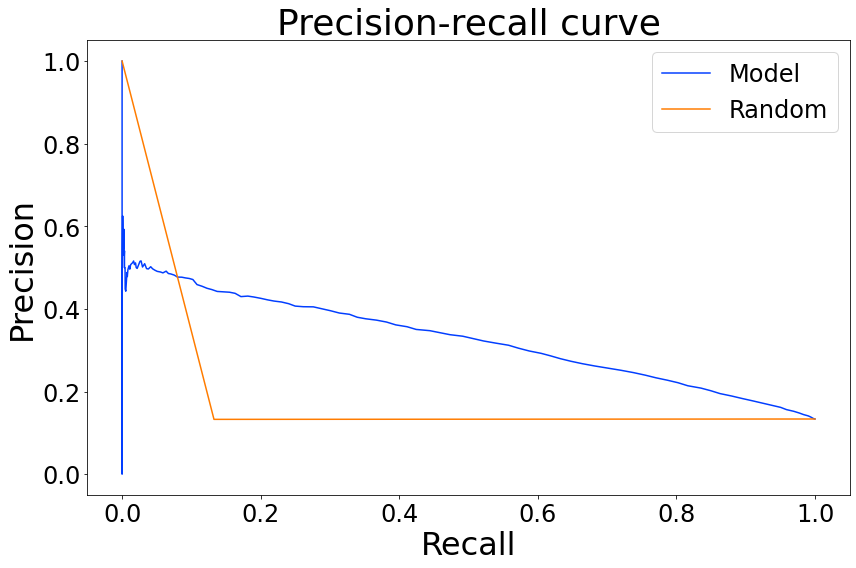

In [80]:
import seaborn as sns
sns.set_palette("bright")
# create a random classifier for comparison
y_rand = np.zeros(43720)
y_rand[:5836] = 1
np.random.shuffle(y_rand)
precision_r, recall_r, pr_th_r = precision_recall_curve(y_test, y_rand)
plt.figure(figsize=(12,8))
plt.plot(recall, precision, label='Model')
plt.plot(recall_r, precision_r, label='Random')
plt.xlabel('Recall', fontsize=32)
plt.ylabel('Precision', fontsize=32)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(fontsize=24)
plt.title('Precision-recall curve', fontsize=36)
plt.tight_layout()
plt.savefig('../images/pr_curve.png')
plt.show()

In [75]:
average_precision_score(y_test, y_pred)/(average_precision_score(y_test, y_rand))

2.405014396578807

In [78]:
feat_df = pd.DataFrame({'Features' : X_test.columns, \
                       'Importance' : gs.best_estimator_.feature_importances_})
feat_df.sort_values(by='Importance', ascending=False, inplace=True)
feat_df.head(10)

,Features,Importance
4,creatinine,0.086263
27,creatinine_var,0.043763
25,creatinine_mean,0.042317
24,creatinine_min,0.040155
26,creatinine_max,0.035419
9,BUN_mean,0.028210
31,glucose_var,0.028135
0,BUN,0.027891
30,glucose_max,0.027099
29,glucose_mean,0.026605


In [214]:
import pickle
filename = '../models/rf_time_series_tuned.pkl'
pickle.dump(gs.best_estimator_, open(filename, 'wb'))

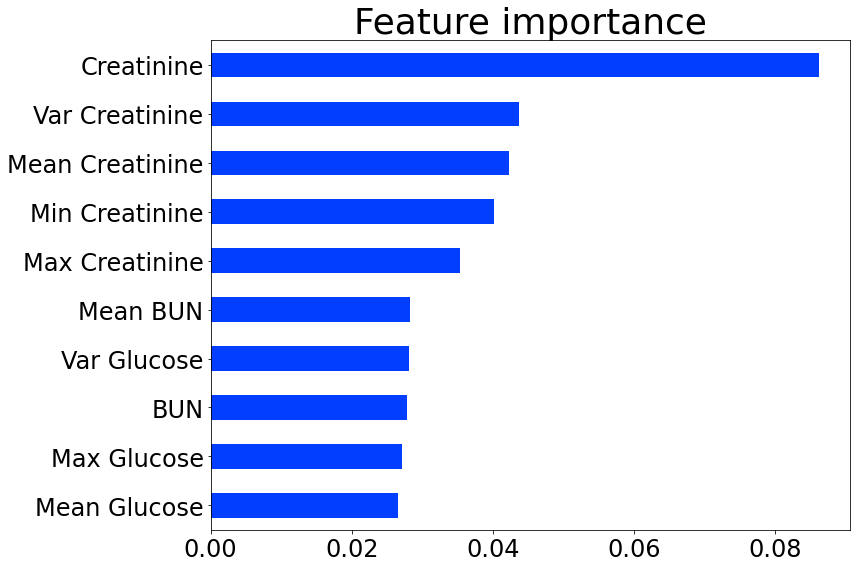

In [83]:
feat_df[:10].sort_values(by='Importance', ascending=True).plot.barh(y='Importance', \
                                                                        x='Features', \
                                                                        legend=None, figsize=(12,8))
plt.title('Feature importance', fontsize=36)
#plt.xlabel('Importance', fontsize=32)
plt.yticks(np.arange(10), ['Mean Glucose', 'Max Glucose', 'BUN', 'Var Glucose', 'Mean BUN', \
                           'Max Creatinine', 'Min Creatinine', 'Mean Creatinine', 'Var Creatinine', 'Creatinine'])
plt.ylabel(None)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.tight_layout()
plt.savefig('../images/feat_imp.png')

In [132]:
potential_ids = fold4[fold4['patientunitstayid'].isin(correct_indices)].groupby('patientunitstayid')['patientunitstayid'].count().sort_values(ascending=False).head(20)
#fold4[(fold4.patientunitstayid.isin(potential_ids.index)) & (fold4.positive_window==1)][['positive_window', 'patientunitstayid']]
potential_ids

patientunitstayid
3028617    33
640243     32
3116174    27
3023518    25
204776     24
234948     23
2804238    22
1354807    21
3024656    21
1632403    20
3157810    20
1850370    20
1125886    20
2520129    20
1070041    19
2834068    19
3189876    18
1592952    18
850911     18
3126631    18
Name: patientunitstayid, dtype: int64

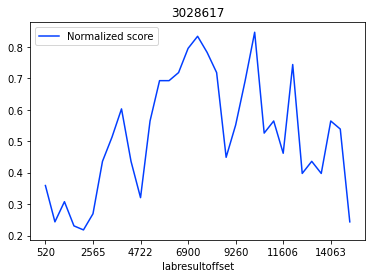

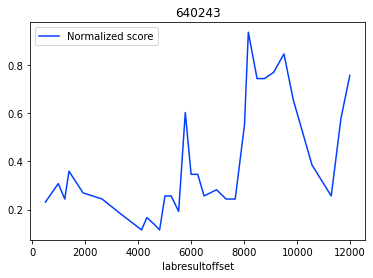

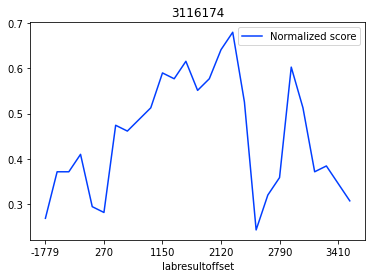

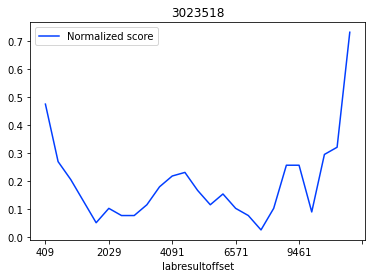

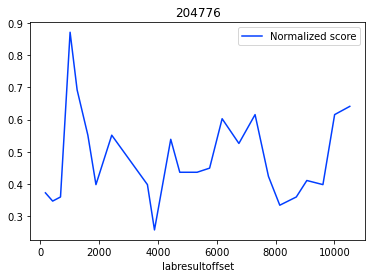

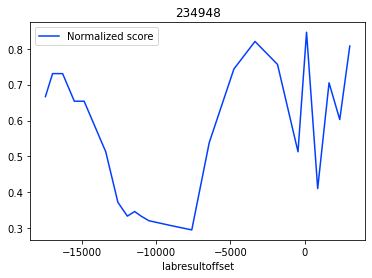

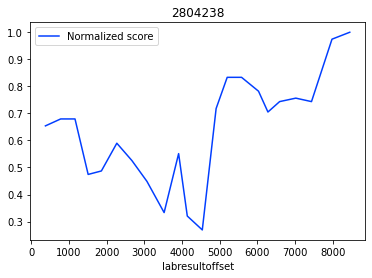

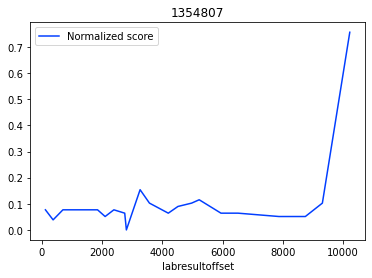

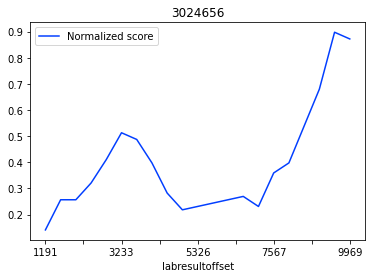

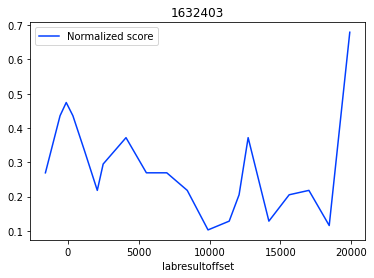

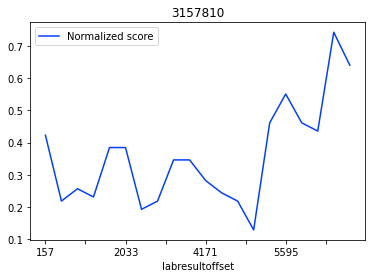

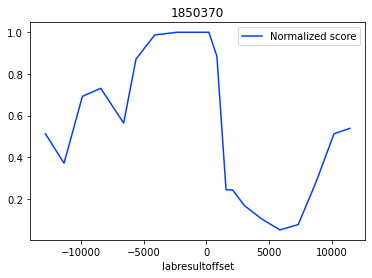

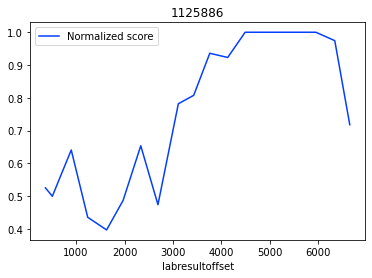

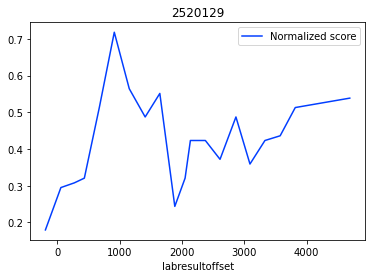

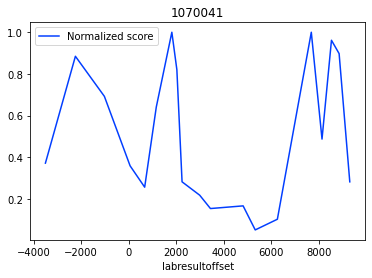

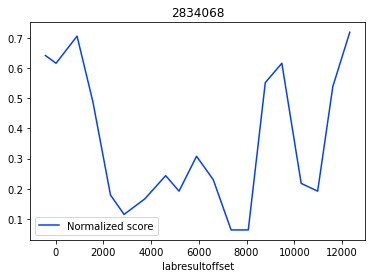

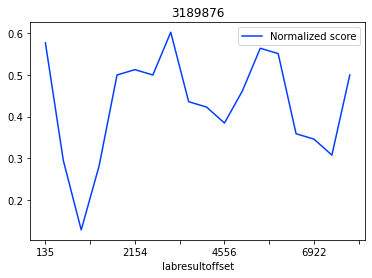

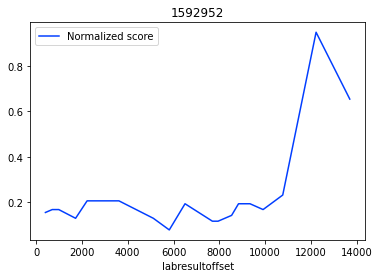

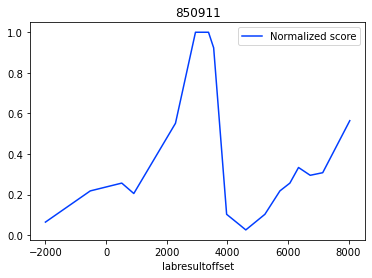

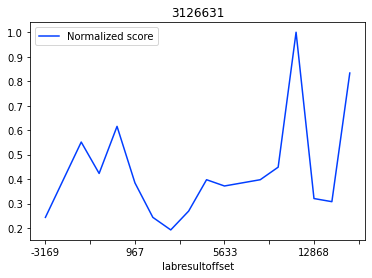

In [263]:
for patid in potential_ids.index.tolist():
    class_gt_pred[class_gt_pred['patientunitstayid']==patid].plot('labresultoffset','Normalized score')
    plt.title(patid)
plt.show()

In [131]:
correct_indices = class_gt_pred[(class_gt_pred['y_test']==1) & (class_gt_pred['y_score']==1)]['patientunitstayid'].unique()
correct_indices.shape

(2515,)

In [223]:
class_gt_pred['Normalized score'] = class_gt_pred['y_pred']/0.195*0.5
class_gt_pred.loc[class_gt_pred['Normalized score']>1, 'Normalized score'] = 1

In [271]:
class_gt_pred_neg = class_gt_pred[class_gt_pred['time_to_detect'].isna()]
class_gt_pred_neg['labresultoffset'] = pd.to_timedelta(class_gt_pred_neg['labresultoffset'])/pd.Timedelta('1m')
class_gt_pred_neg.head()

<ipython-input-271-a74be5d24461>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,patientunitstayid,time_to_detect,labresultoffset,creatinine,BUN,positive_window,y_test,y_pred,y_score,Normalized score
0,141229,NaT,1389.0,1.13,20.0,0.0,0.0,0.100,0.0,0.256410
1,141229,NaT,1737.0,1.22,21.0,0.0,0.0,0.215,1.0,0.551282
15,141594,NaT,753.0,2.00,49.0,0.0,0.0,0.170,0.0,0.435897
16,141594,NaT,2233.0,1.80,42.0,0.0,0.0,0.130,0.0,0.333333
17,141594,NaT,3678.0,1.40,30.0,0.0,0.0,0.040,0.0,0.102564


In [303]:
#import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y": True}]])

df = class_gt_pred[class_gt_pred['patientunitstayid']==850911]
df['labresultoffset (days)'] = df['labresultoffset']/(60*24)

fig.add_trace(go.Scatter(
    x=df['labresultoffset (days)'],
    y=df['Normalized score'],
    name='Probability'), 
    secondary_y=False)

fig.add_trace(
    go.Scatter(x=df['labresultoffset (days)'], y=df['creatinine'], name="Creatinine"),
    secondary_y=True)

fig.update_layout(
    title = 'Probability of acute kidney injury in the next 12-36h',
    xaxis_title="Days in relation to ICU admission",
    yaxis_title="Normalized probability")

fig.update_yaxes(title_text="Normalized probability",range=[0,1], secondary_y=False)
fig.update_yaxes(title_text="Creatinine", secondary_y=True)
fig.show()

#class_gt_pred[class_gt_pred['patientunitstayid']==3126631].sort_values(by='labresultoffset', ascending=True, inplace=True)
#class_gt_pred[class_gt_pred['patientunitstayid']==850911].plot('time_to_detect','Normalized score')

<ipython-input-303-5071a74bad35>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [209]:
class_gt_pred_neg[class_gt_pred_neg['labresultoffset']==0]

,patientunitstayid,time_to_detect,labresultoffset,positive_window,y_test,y_pred,y_score,Normalized score


In [143]:
class_gt_pred.y_pred.max()

0.71

In [234]:
class_gt_pred[class_gt_pred['patientunitstayid']==850911]

,patientunitstayid,time_to_detect,labresultoffset,creatinine,BUN,positive_window,y_test,y_pred,y_score,Normalized score
14523,850911,7 days 11:41:00,-2002,0.67,15.0,0.0,0.0,0.025,0.0,0.064103
14524,850911,6 days 11:01:00,-522,0.74,26.0,0.0,0.0,0.085,0.0,0.217949
14525,850911,5 days 17:42:00,517,0.77,25.0,0.0,0.0,0.100,0.0,0.256410
14526,850911,5 days 11:05:00,914,0.71,23.0,0.0,0.0,0.080,0.0,0.205128
14527,850911,4 days 12:10:00,2289,0.89,26.0,0.0,0.0,0.215,1.0,0.551282
14528,850911,4 days 01:10:00,2949,1.03,38.0,0.0,0.0,0.485,1.0,1.000000
14529,850911,3 days 18:00:00,3379,1.03,36.0,0.0,0.0,0.465,1.0,1.000000
14530,850911,3 days 15:10:00,3549,1.01,36.0,0.0,0.0,0.360,1.0,0.923077
14531,850911,3 days 08:02:00,3977,0.92,29.0,0.0,0.0,0.040,0.0,0.102564
14532,850911,3 days 00:58:00,4401,0.79,24.0,0.0,0.0,0.020,0.0,0.051282


In [235]:
(8040+12*60+19)/(60*24)

6.096527777777778

In [290]:
negative_indices = class_gt_pred.loc[class_gt_pred['time_to_detect'].isna()]['patientunitstayid'].unique()
negative_indices

array([ 141229,  141594,  141596, ..., 3352460, 3352755, 3353147])

In [291]:
potential_neg_ids = fold4[fold4['patientunitstayid'].isin(negative_indices)].groupby('patientunitstayid')['patientunitstayid'].count().sort_values(ascending=False).head(20)
potential_neg_ids

patientunitstayid
2186183    49
819936     38
3086880    32
3161245    30
3125412    29
3199542    28
3126955    27
918885     25
2638086    25
3049584    25
2879353    24
1103482    24
3175172    24
2037725    24
3202323    23
2273278    23
1024589    23
286175     22
1074695    21
1085507    21
Name: patientunitstayid, dtype: int64

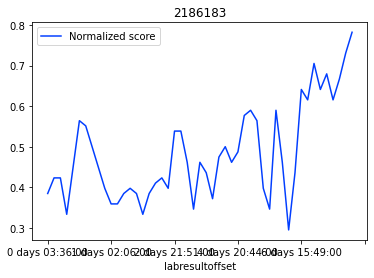

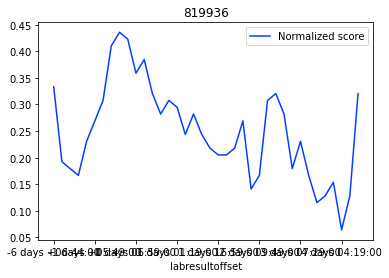

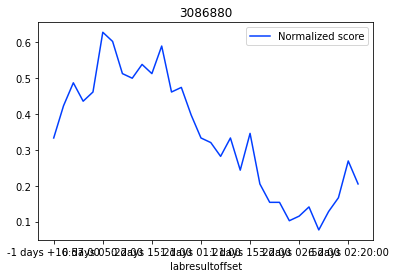

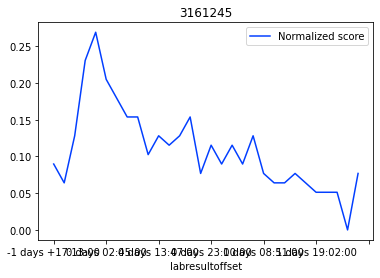

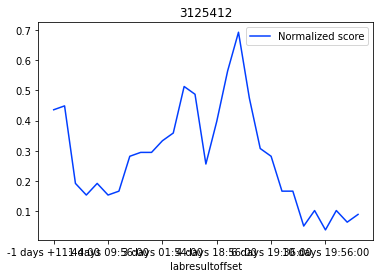

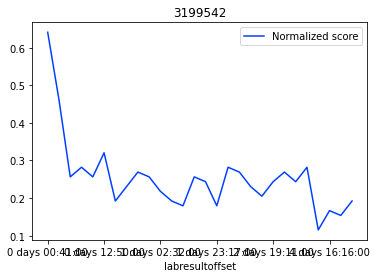

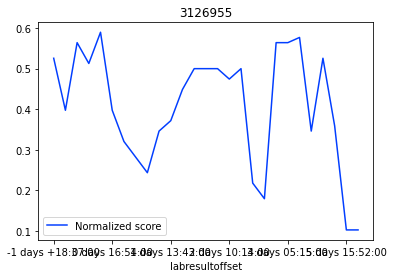

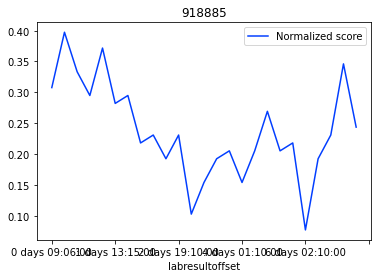

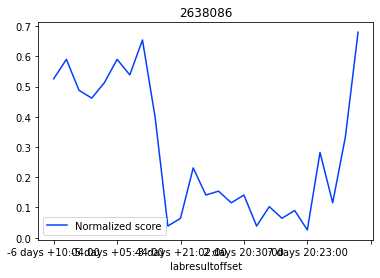

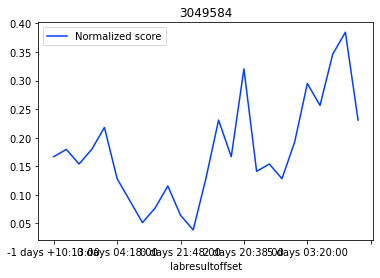

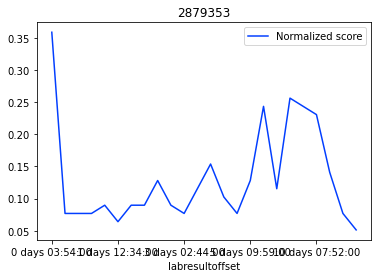

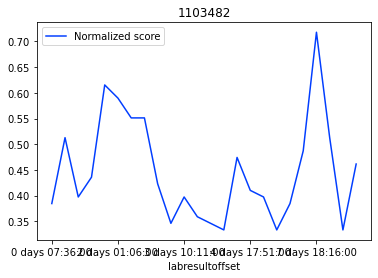

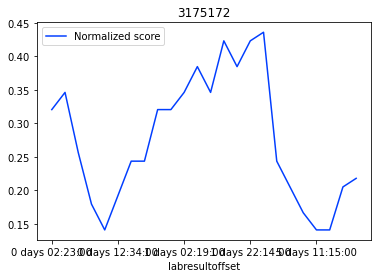

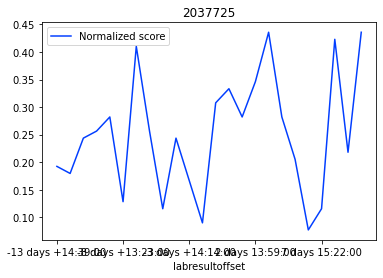

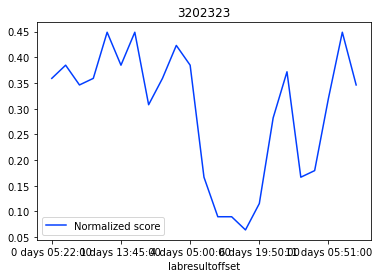

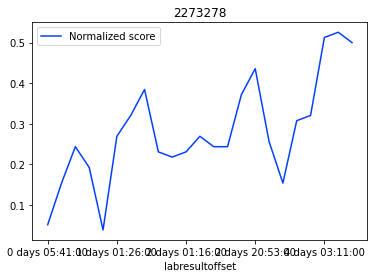

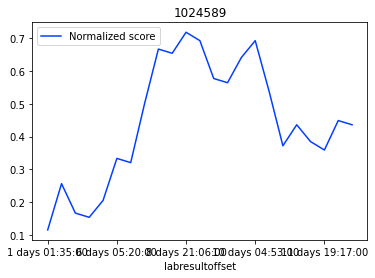

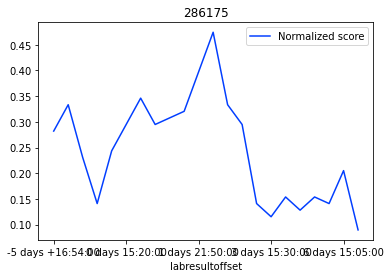

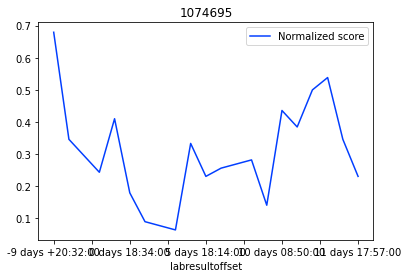

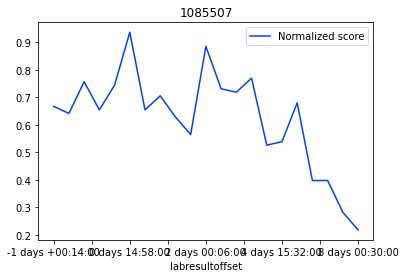

In [292]:
for patid in potential_neg_ids.index.tolist():
    class_gt_pred[class_gt_pred['patientunitstayid']==patid].plot('labresultoffset','Normalized score')
    plt.title(patid)
plt.show()

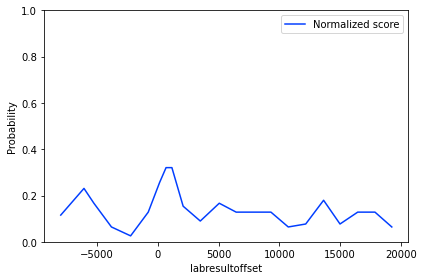

In [191]:
class_gt_pred[class_gt_pred['patientunitstayid']==580870].plot('labresultoffset','Normalized score')
plt.ylabel('Probability')
plt.ylim(0, 1)
plt.tight_layout()
#plt.hlines(0.5, ls = '--', c='k')

In [210]:
x_coord = class_gt_pred[class_gt_pred['patientunitstayid']==580870]
x_coord

,patientunitstayid,time_to_detect,labresultoffset,positive_window,y_test,y_pred,y_score,Normalized score
10820,580870,58 days 22:15:00,-7987,0.0,0.0,0.045,0.0,0.115385
10821,580870,57 days 14:25:00,-6077,0.0,0.0,0.090,0.0,0.230769
10822,580870,57 days 00:50:00,-5262,0.0,0.0,0.065,0.0,0.166667
10823,580870,56 days 00:46:00,-3818,0.0,0.0,0.025,0.0,0.064103
10824,580870,54 days 22:30:00,-2242,0.0,0.0,0.010,0.0,0.025641
10825,580870,53 days 22:20:00,-792,0.0,0.0,0.050,0.0,0.128205
10826,580870,53 days 06:45:00,143,0.0,0.0,0.100,0.0,0.256410
10827,580870,52 days 21:55:00,673,0.0,0.0,0.125,0.0,0.320513
10828,580870,52 days 13:55:00,1153,0.0,0.0,0.125,0.0,0.320513
10829,580870,51 days 22:30:00,2078,0.0,0.0,0.060,0.0,0.153846


In [193]:
class_gt_pred['labresultoffset'].describe()

count               43720
unique              24303
top       0 days 11:16:00
freq                   15
Name: labresultoffset, dtype: object

In [180]:
#class_gt_pred.loc[class_gt_pred['labresultoffset']==0, 'labresultoffset'] = pd.Timedelta('999d')
class_gt_pred.loc[class_gt_pred['labresultoffset']=='0', 'labresultoffset'] = pd.Timedelta('999d')
class_gt_pred.loc[[7744, 46074, 77103, 58939]]

,patientunitstayid,time_to_detect,labresultoffset,positive_window,y_test,y_pred,y_score,Normalized score
7744,451084,0 days 13:32:00,999 days 00:00:00,1.0,1.0,0.340,1.0,0.871795
46074,1798630,1 days 03:00:00,999 days 00:00:00,1.0,1.0,0.205,1.0,0.525641
77103,3137500,0 days 22:05:00,999 days 00:00:00,1.0,1.0,0.170,0.0,0.435897
58939,2697453,1 days 02:55:00,999 days 00:00:00,1.0,1.0,0.260,1.0,0.666667


In [183]:
class_gt_pred.loc[class_gt_pred['labresultoffset']==0]

,patientunitstayid,time_to_detect,labresultoffset,positive_window,y_test,y_pred,y_score,Normalized score


In [186]:
fold4.head()

,patientunitstayid,time_to_detect,labresultoffset,akidetection,age,gender,ethnicity,patienthealthsystemstayid,hospitaladmitoffset,unitdischargeoffset,...,glucose_max,glucose_var,potassium_min,potassium_mean,potassium_max,potassium_var,sodium_min,sodium_mean,sodium_max,sodium_var
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,141227,1 days 00:50:00,-128,1362.0,82,Male,Caucasian,128968,-1004,1652,...,130.0,200.000000,4.2,4.200000,4.2,0.000000,133.0,133.500000,134.0,0.500000
1,141227,0 days 22:55:00,-13,1362.0,82,Male,Caucasian,128968,-1004,1652,...,157.0,556.333333,4.1,4.166667,4.2,0.003333,132.0,133.000000,134.0,1.000000
2,141462,2 days 20:56:00,-1114,3022.0,80,Male,Caucasian,129166,-1,5198,...,283.0,24.500000,3.3,3.450000,3.6,0.045000,136.0,137.000000,138.0,2.000000
3,141462,1 days 23:10:00,192,3022.0,80,Male,Caucasian,129166,-1,5198,...,283.0,56.333333,3.3,3.533333,3.7,0.043333,132.0,135.333333,138.0,9.333333
4,141462,0 days 23:35:00,1607,3022.0,80,Male,Caucasian,129166,-1,5198,...,276.0,277.333333,3.3,3.600000,3.8,0.070000,132.0,134.333333,136.0,4.333333


In [293]:
publiation_df = class_gt_pred.loc[class_gt_pred['patientunitstayid'].isin([1354807, 3024656, 3157810, \
                                                                           204776])][['patientunitstayid', \
                                                                                      'labresultoffset', \
                                                                                      'creatinine', \
                                                                                      'Normalized score']]
publiation_df

,patientunitstayid,labresultoffset,creatinine,Normalized score
2706,204776,177,1.29,0.371795
2707,204776,423,1.26,0.346154
2708,204776,690,1.28,0.358974
2709,204776,1016,1.45,0.871795
2710,204776,1255,1.39,0.692308
...,...,...,...,...
78732,3157810,5595,0.70,0.551282
78733,3157810,5932,0.60,0.461538
78734,3157810,6292,0.50,0.435897
78735,3157810,6524,0.70,0.743590


In [294]:
publiation_df2 = class_gt_pred_neg.loc[class_gt_pred_neg['patientunitstayid'].isin([819936, 3161245, 918885,\
                                                                                    2273278])][['patientunitstayid', \
                                                                                      'labresultoffset', \
                                                                                      'creatinine', \
                                                                                      'Normalized score']]


In [295]:
publication_df = pd.concat([publiation_df, publiation_df2], axis=0)
publication_df.shape

(202, 4)

In [296]:
publication_df.loc[publication_df['patientunitstayid']==1354807, 'patient'] = 1
publication_df.loc[publication_df['patientunitstayid']==3024656, 'patient'] = 2
publication_df.loc[publication_df['patientunitstayid']==3157810, 'patient'] = 3
publication_df.loc[publication_df['patientunitstayid']==204776, 'patient'] = 4
publication_df.loc[publication_df['patientunitstayid']==819936, 'patient'] = 5
publication_df.loc[publication_df['patientunitstayid']==3161245, 'patient'] = 6
publication_df.loc[publication_df['patientunitstayid']==918885, 'patient'] = 7
publication_df.loc[publication_df['patientunitstayid']==2273278, 'patient'] = 8
publication_df

,patientunitstayid,labresultoffset,creatinine,Normalized score,patient
2706,204776,177,1.29,0.371795,4.0
2707,204776,423,1.26,0.346154,4.0
2708,204776,690,1.28,0.358974,4.0
2709,204776,1016,1.45,0.871795,4.0
2710,204776,1255,1.39,0.692308,4.0
...,...,...,...,...,...
82068,3161245,2582,0.53,0.051282,6.0
82069,3161245,2731,0.53,0.051282,6.0
82070,3161245,2874,0.57,0.051282,6.0
82071,3161245,2986,0.53,0.000000,6.0


In [307]:
publication_df['labresultoffset'].tolist()

[177,
 423,
 690,
 1016,
 1255,
 1620,
 1895,
 2432,
 3645,
 3885,
 4438,
 4745,
 5333,
 5759,
 6185,
 6755,
 7305,
 7760,
 8145,
 8707,
 9065,
 9612,
 10010,
 10525,
 126,
 381,
 706,
 1371,
 1855,
 2106,
 2396,
 2756,
 2811,
 3266,
 3576,
 4201,
 4521,
 4975,
 5226,
 5948,
 6513,
 7871,
 8746,
 9311,
 10220,
 '1191',
 '1318',
 '1762',
 '2266',
 '2792',
 '3233',
 '3733',
 '4255',
 '4622',
 '4965',
 '5326',
 '5659',
 '6163',
 '6606',
 '7130',
 '7567',
 '8055',
 '8523',
 '9002',
 '9480',
 '9969',
 '157',
 '523',
 '922',
 '1283',
 '1609',
 '2033',
 '2330',
 '2963',
 '3605',
 '3999',
 '4171',
 '4430',
 '4724',
 '5108',
 '5442',
 '5595',
 '5932',
 '6292',
 '6524',
 '6886',
 -8236.0,
 -6911.0,
 -4716.0,
 -4043.0,
 -2693.0,
 -1091.0,
 -221.0,
 -146.0,
 54.0,
 304.0,
 419.0,
 544.0,
 919.0,
 1144.0,
 1284.0,
 1519.0,
 1849.0,
 2097.0,
 2203.0,
 2347.0,
 2459.0,
 2645.0,
 2774.0,
 2914.0,
 3214.0,
 3469.0,
 3714.0,
 3984.0,
 4249.0,
 4559.0,
 4769.0,
 5059.0,
 5344.0,
 5539.0,
 5779.0,
 6019.0

In [312]:
#publication_df['labresultoffset'] = pd.to_numeric(publication_df['labresultoffset'])
#publication_df['Lab measurement day'] = publication_df['labresultoffset']/(24*60)
publication_df.drop('labresultoffset', axis=1, inplace=True)
publication_df

,patientunitstayid,creatinine,Normalized score,patient,Lab measurement day
2706,204776,1.29,0.371795,4.0,0.122917
2707,204776,1.26,0.346154,4.0,0.293750
2708,204776,1.28,0.358974,4.0,0.479167
2709,204776,1.45,0.871795,4.0,0.705556
2710,204776,1.39,0.692308,4.0,0.871528
...,...,...,...,...,...
82068,3161245,0.53,0.051282,6.0,1.793056
82069,3161245,0.53,0.051282,6.0,1.896528
82070,3161245,0.57,0.051282,6.0,1.995833
82071,3161245,0.53,0.000000,6.0,2.073611


In [313]:
publication_df.to_csv('../data/final/for_app.csv', index=None)

In [311]:
177/(24*60)

0.12291666666666666

In [315]:
fig = make_subplots(specs=[[{"secondary_y": True}]])
df = publication_df[publication_df['patientunitstayid']==3161245]

fig.add_trace(go.Scatter(
    x=df['Lab measurement day'],
    y=df['Normalized score'],
    name='Probability'), 
    secondary_y=False)

fig.add_trace(
    go.Scatter(x=df['Lab measurement day'], y=df['creatinine'], name="Creatinine"),
    secondary_y=True)

fig.update_layout(
    title = 'Probability of acute kidney injury in the next 12-36h',
    xaxis_title="Days in relation to ICU admission")

fig.update_yaxes(title_text="Normalized probability",range=[0,1], secondary_y=False)
fig.update_yaxes(title_text="Creatinine", secondary_y=True)

In [318]:
# do a random forest fit after removal of highy correlated features
from itertools import compress

# Define a function for generating the array and dictionary with correlated columns
def corr_extractor(corr_mat, cols_list, thresh):
    """With correlation matrix, list of columns (for which the 
    correlation matrix was calculated), and threshold (for 
    cooefficient comparison) as input return an array of 
    redundant column (to drop) and a dictionary to inspect 
    the correlations."""
    corr_mat_asym = np.tril(corr_mat, -1) # set the top half triangle of the matrix (including main diagonal) to 0
    bool_mask = abs(corr_mat_asym)>=thresh # create a boolean mask for values above the threshold

    corr_array = [] # initiate empty array and dictionary
    corr_dict = {}
    
    for i in range(len(cols_list)): 
        # iterate through the columns in cols_array and extract the associated column names with the boolean mask
        cors = list(compress(cols_list, bool_mask[:,i]))
        if cors!= []:
            corr_dict[cols_list[i]]=[]
            # create a key value pair, key= (query) column name values = list of associated columns
            corr_dict[cols_list[i]]+=cors
            for elem in cors:
                corr_array.append(elem) # create a list only with the redundant column (excluding the query)
    
    corr_array = list(dict.fromkeys(corr_array)) # drop duplicates
    
    return corr_array, corr_dict

Text(0.5, 1.0, 'Pearson correlation coefficient between numerical features')

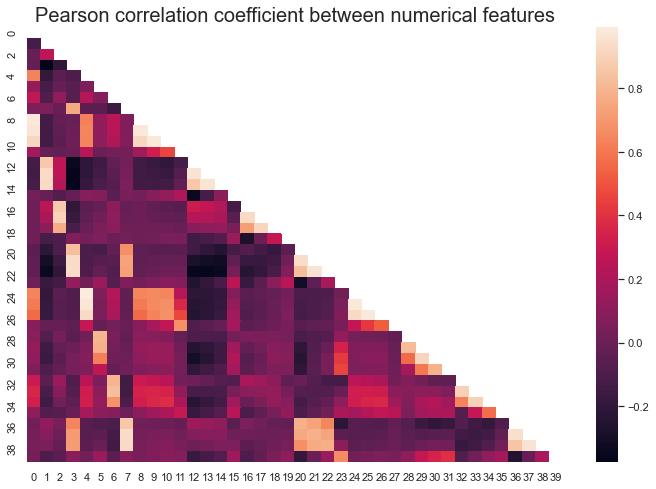

In [339]:
# Calculate Pearson correlation coefficient
#num_df = train_df_med[num_feat]
num_corr_mat = np.corrcoef(X_train.values, rowvar=False)

mask = np.triu(np.ones_like(num_corr_mat, dtype=np.bool))
sns.set(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 8))

ax = sns.heatmap(num_corr_mat, annot=False, mask=mask)
ax.set_title("Pearson correlation coefficient between numerical features", fontsize=20)

In [343]:
#determine the numerical features that have a Pearson correlation coeffient above 0.95
num_corr_to_drop, num_corr_dict = corr_extractor(num_corr_mat, X_train.columns.tolist(), 0.95)
print("The number of redundant numerical features is ", len(num_corr_to_drop))
print("The number of remaining numerical features is ", len(X_train.columns.tolist())-len(num_corr_to_drop))

The number of redundant numerical features is  11
The number of remaining numerical features is  29


Text(0.5, 1.0, 'Pearson correlation coefficient between numerical features')

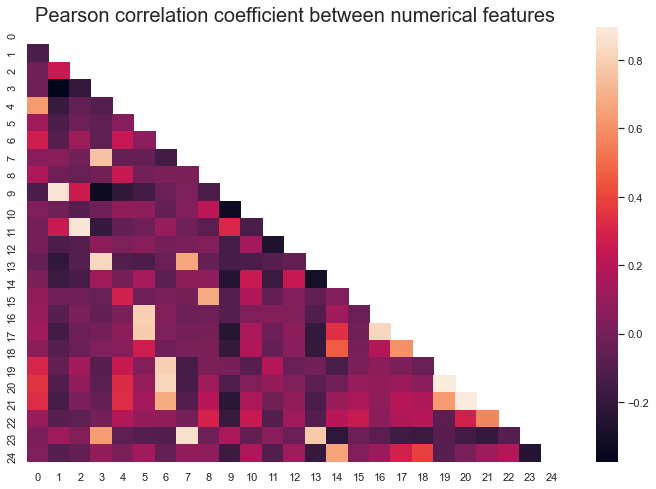

In [334]:
num_corr_mat = np.corrcoef(X_train_red.values, rowvar=False)

mask = np.triu(np.ones_like(num_corr_mat, dtype=np.bool))
sns.set(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 8))

ax = sns.heatmap(num_corr_mat, annot=False, mask=mask)
ax.set_title("Pearson correlation coefficient between numerical features", fontsize=20)

In [344]:
X_train_red = X_train.drop(columns = num_corr_to_drop)
X_test_red = X_test.drop(columns = num_corr_to_drop)

rf_red = RandomForestClassifier(class_weight='balanced', random_state=random_state)
param_grid = {'max_depth' : [3, 6, 12, None], 'n_estimators' : [10, 50, 100, 200], 'max_features': [None, 'sqrt'], \
              'min_samples_split': [2, 10]}
scoring = {'AUC':'roc_auc', 'Average precision':make_scorer(average_precision_score)}
gs_red = GridSearchCV(estimator=rf_red, param_grid=param_grid, scoring=scoring, refit='Average precision',\
                  n_jobs=-1, cv=custom_cv, verbose=1, return_train_score=True)
gs_red.fit(X_train_red, y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 192 out of 192 | elapsed: 102.8min finished


GridSearchCV(cv=[(array([   27,    28,    40, ..., 89318, 89319, 89320]),
                  array([    5,     6,     7, ..., 89329, 89330, 89331])),
                 (array([   27,    28,    40, ..., 89329, 89330, 89331]),
                  array([    8,    17,    81, ..., 89318, 89319, 89320])),
                 (array([    8,    17,    81, ..., 89329, 89330, 89331]),
                  array([   27,    28,    40, ..., 89313, 89321, 89322]))],
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=...
                                              random_state=2020, verbose=0,
                                              warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [3, 6, 12, None],
                         'max_features': [None, 'sqrt'],
                         'min_samples_split': [2, 10],
                         'n_est

[[9.99788829e-01 2.11170943e-04]
 [9.98971899e-01 1.02810144e-03]]
              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93     37884
         1.0       0.43      0.00      0.00      5836

    accuracy                           0.87     43720
   macro avg       0.65      0.50      0.47     43720
weighted avg       0.81      0.87      0.80     43720

Average precision: 0.24865013965659905
Average ROC score: 0.7003156785777066


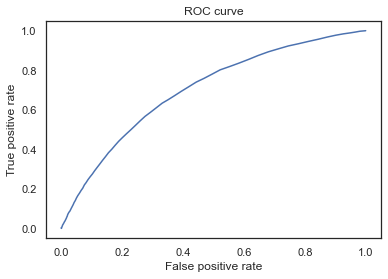

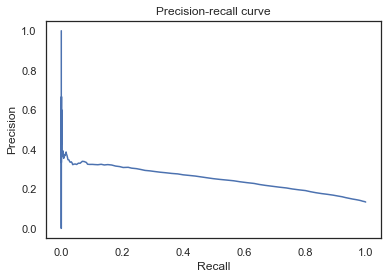

In [346]:
y_score = gs_red.best_estimator_.predict(X_test_red)

print(confusion_matrix(y_test,y_score, normalize='true'))
print(classification_report(y_test,y_score))

y_pred = gs_red.best_estimator_.predict_proba(X_test_red)[:,1]
print('Average precision: {}'.format(average_precision_score(y_test, y_pred)))
print('Average ROC score: {}'.format(roc_auc_score(y_test, y_pred)))

fpr, tpr, auc_th = roc_curve(y_test, y_pred)
precision, recall, pr_th = precision_recall_curve(y_test, y_pred)

plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-recall curve')
plt.show()



In [347]:
X_train_red.shape

(132164, 29)